In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import statsmodels
import warnings
warnings.filterwarnings('ignore')
from sklearn import set_config
set_config(print_changed_only=False)

In [2]:
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Seaborn version:',sns.__version__)
print('Matplotlib version:',matplotlib.__version__)
print('Sklearn version:',sklearn.__version__)
print('Statsmodels version:',statsmodels.__version__)

Numpy version: 1.20.3
Pandas version: 1.3.4
Seaborn version: 0.11.2
Matplotlib version: 3.4.3
Sklearn version: 0.24.2
Statsmodels version: 0.12.2


In [3]:
from statsmodels.graphics.tsaplots import month_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.tools.eval_measures as em
from sklearn.metrics import  mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [4]:
df1 = pd.read_csv('Sparkling.csv')

In [5]:
df1.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [6]:
df1.tail()

,YearMonth,Sparkling
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688
186,1995-07,2031


In [7]:
df1 = pd.read_csv('Sparkling.csv', parse_dates = ['YearMonth'])
df1.head()

,YearMonth,Sparkling
0,1980-01-01,1686
1,1980-02-01,1591
2,1980-03-01,2304
3,1980-04-01,1712
4,1980-05-01,1471


In [8]:
df1.tail()

,YearMonth,Sparkling
182,1995-03-01,1897
183,1995-04-01,1862
184,1995-05-01,1670
185,1995-06-01,1688
186,1995-07-01,2031


In [9]:
df1.set_index(keys = 'YearMonth', inplace = True)
df1.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [10]:
df1.tail()

,Sparkling
YearMonth,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


In [11]:
df1.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


In [12]:
df1.isna().sum()

Sparkling    0
dtype: int64

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,7

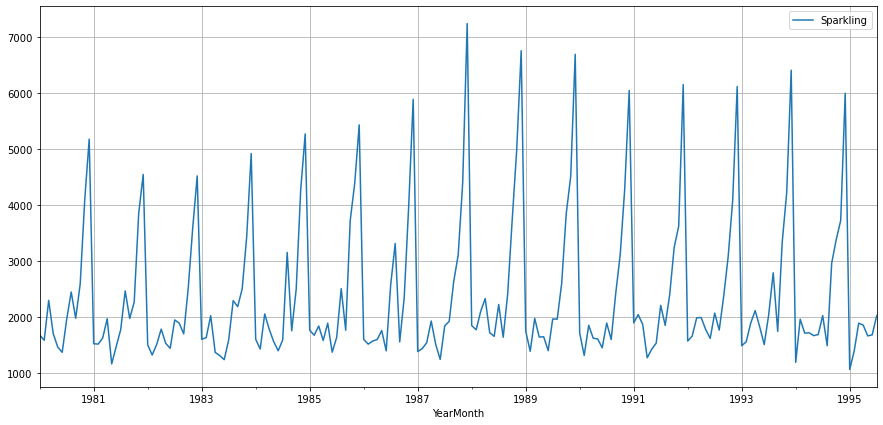

In [14]:
df1.plot(grid=True);

In [15]:
df1['1993']

,Sparkling
YearMonth,
1993-01-01,1494
1993-02-01,1564
1993-03-01,1898
1993-04-01,2121
1993-05-01,1831
1993-06-01,1515
1993-07-01,2048
1993-08-01,2795
1993-09-01,1749


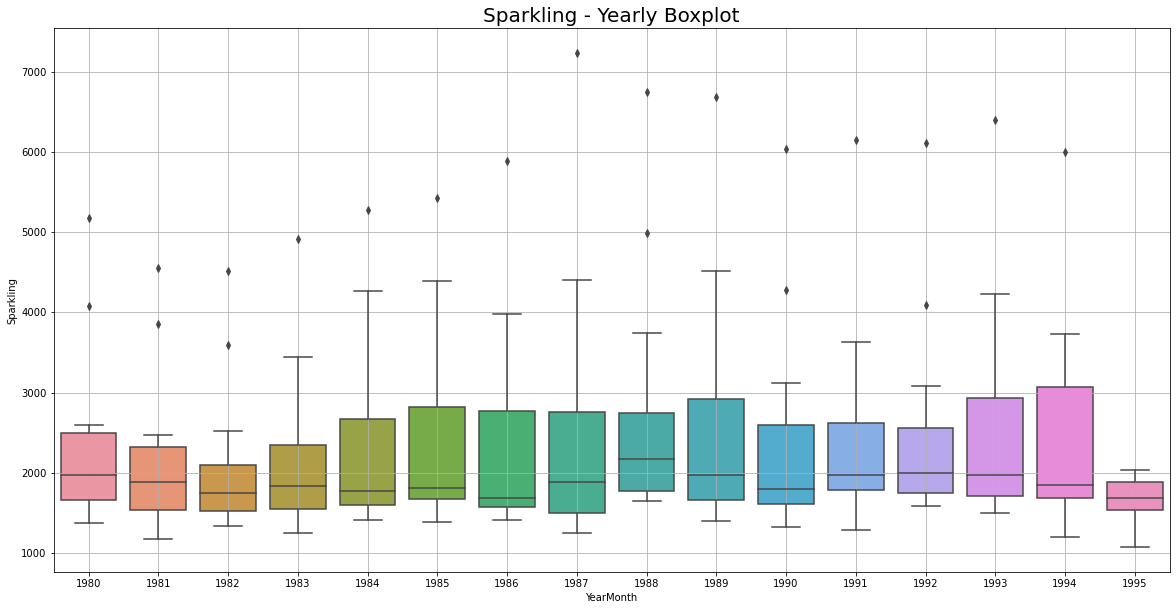

In [16]:
plt.figure(figsize = (20, 10))
sns.boxplot(x = df1.index.year, y = df1['Sparkling'])
plt.title('Sparkling - Yearly Boxplot', fontsize=20)
plt.grid()
plt.show()

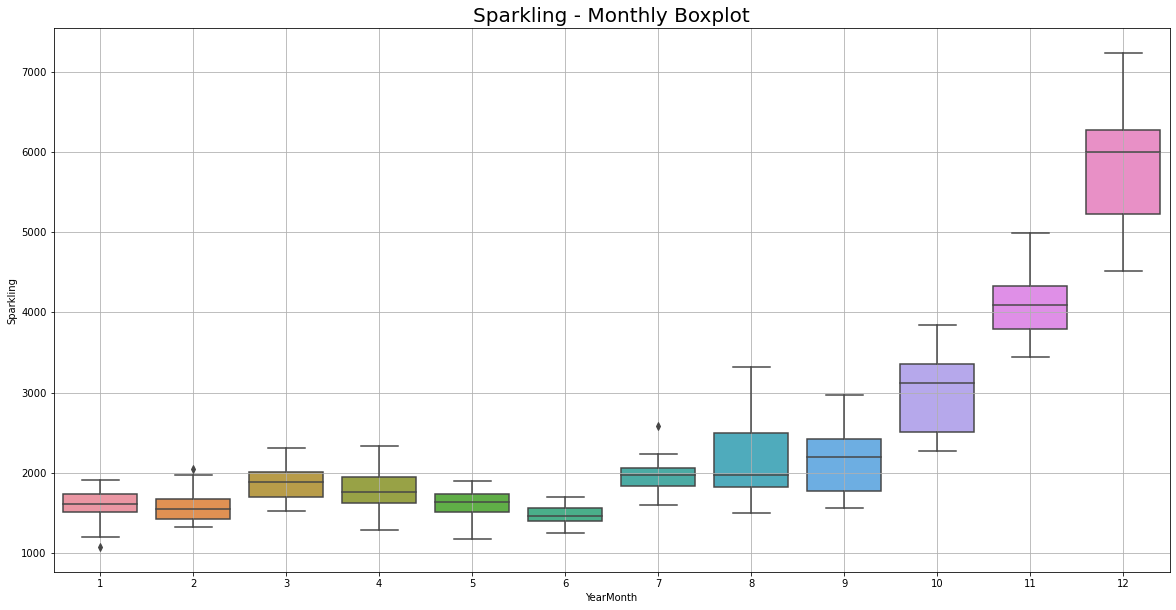

In [17]:
plt.figure(figsize = (20, 10))
sns.boxplot(x = df1.index.month, y = df1['Sparkling'])
plt.title('Sparkling - Monthly Boxplot', fontsize=20)
plt.grid()
plt.show()

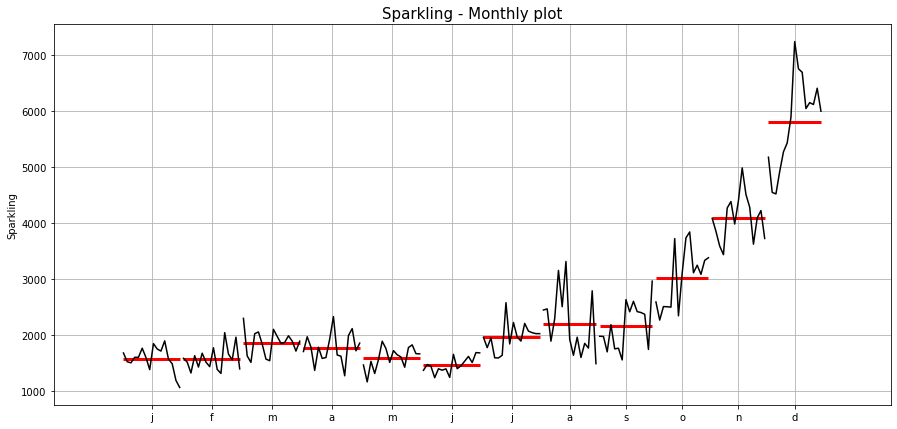

In [18]:
month_plot(df1, ylabel = 'Sparkling')
plt.title('Sparkling - Monthly plot', fontsize = 15)
plt.grid();

In [19]:
yearly_sales_across_months = pd.pivot_table(df1, values = 'Sparkling', columns = df1.index.month, 
                                        index = df1.index.year)
yearly_sales_across_months

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


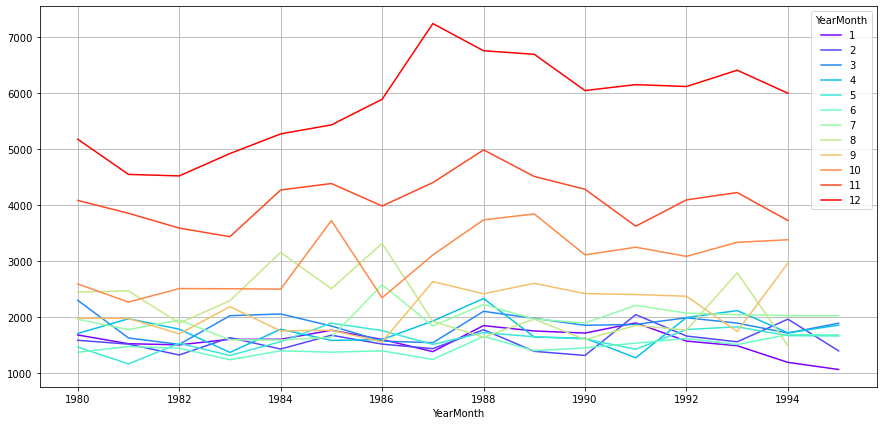

In [20]:
yearly_sales_across_months.plot(colormap='rainbow')
plt.grid();

In [21]:
df_yearly_sum = df1.resample('A').sum()
df_yearly_sum.head()

,Sparkling
YearMonth,
1980-12-31,28406
1981-12-31,26227
1982-12-31,25321
1983-12-31,26180
1984-12-31,28431


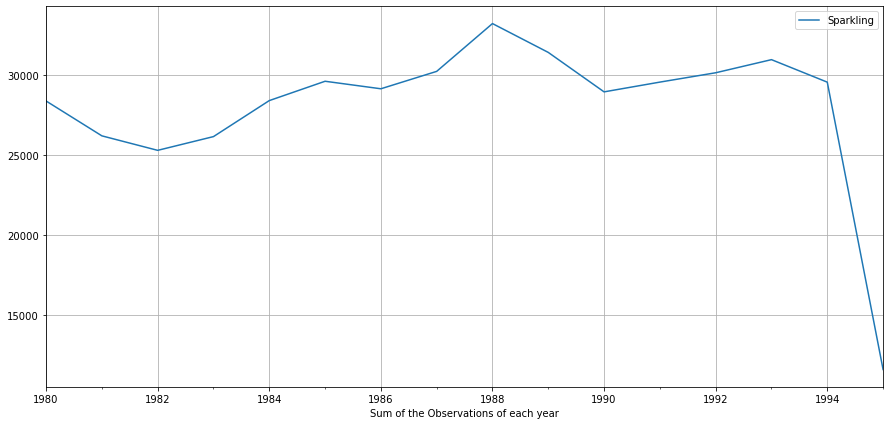

In [22]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

In [23]:
df_yearly_mean = df1.resample('Y').mean()
df_yearly_mean.head()

,Sparkling
YearMonth,
1980-12-31,2367.166667
1981-12-31,2185.583333
1982-12-31,2110.083333
1983-12-31,2181.666667
1984-12-31,2369.250000


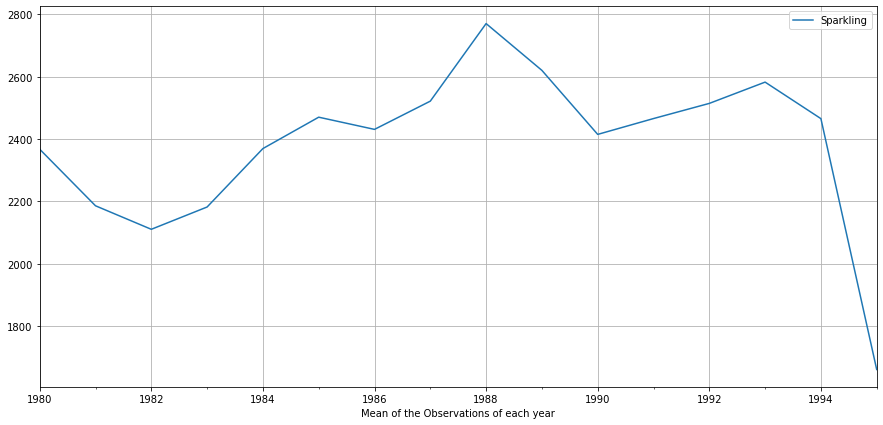

In [24]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

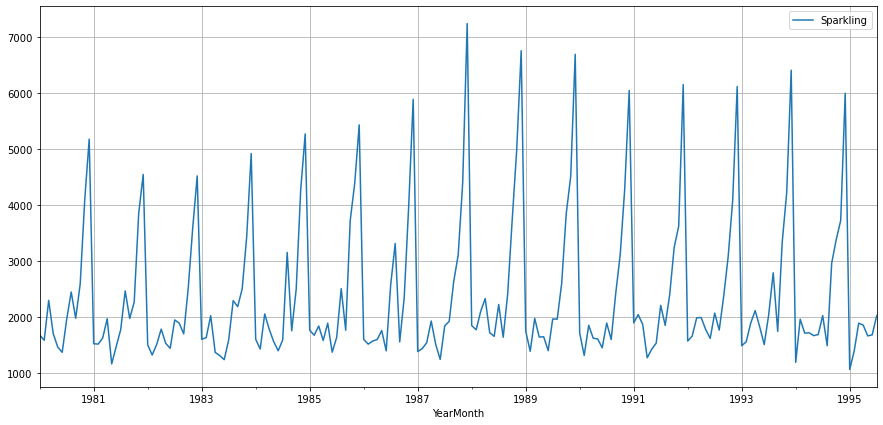

In [25]:
df1.plot()
plt.grid();

In [26]:
df_quarterly_sum = df1.resample('Q').sum()
df_quarterly_sum.head()

,Sparkling
YearMonth,
1980-03-31,5581
1980-06-30,4560
1980-09-30,6403
1980-12-31,11862
1981-03-31,4686


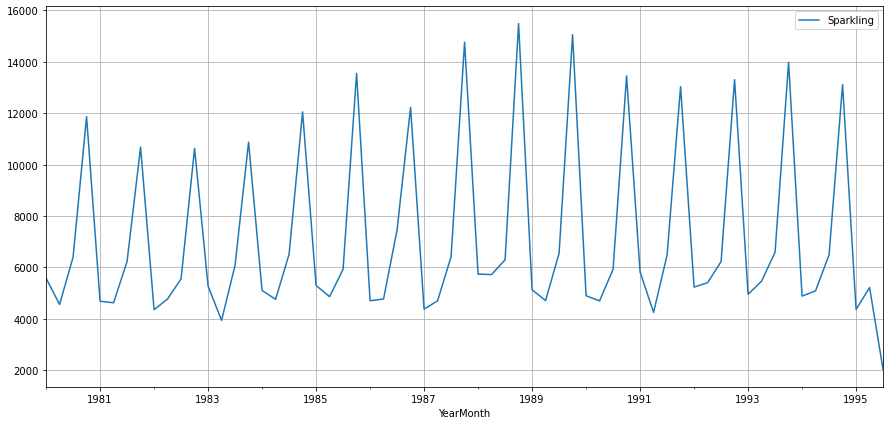

In [27]:
df_quarterly_sum.plot();
plt.grid()

In [28]:
df_quarterly_mean = df1.resample('Q').mean()
df_quarterly_mean.head()

,Sparkling
YearMonth,
1980-03-31,1860.333333
1980-06-30,1520.000000
1980-09-30,2134.333333
1980-12-31,3954.000000
1981-03-31,1562.000000


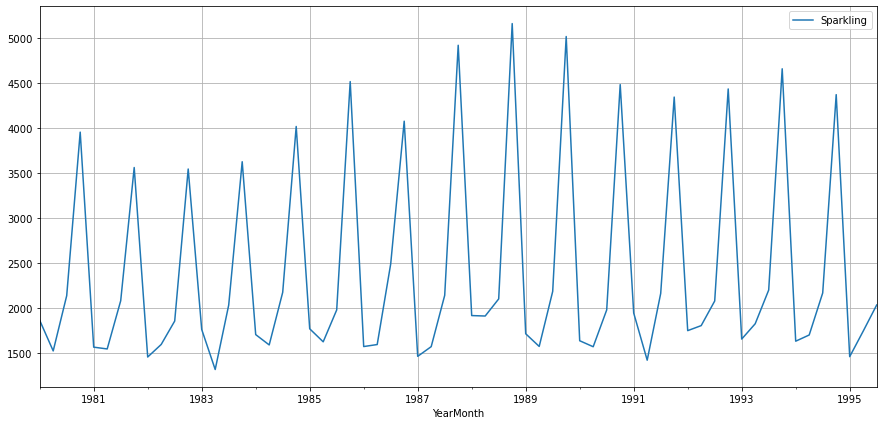

In [29]:
df_quarterly_mean.plot();
plt.grid()

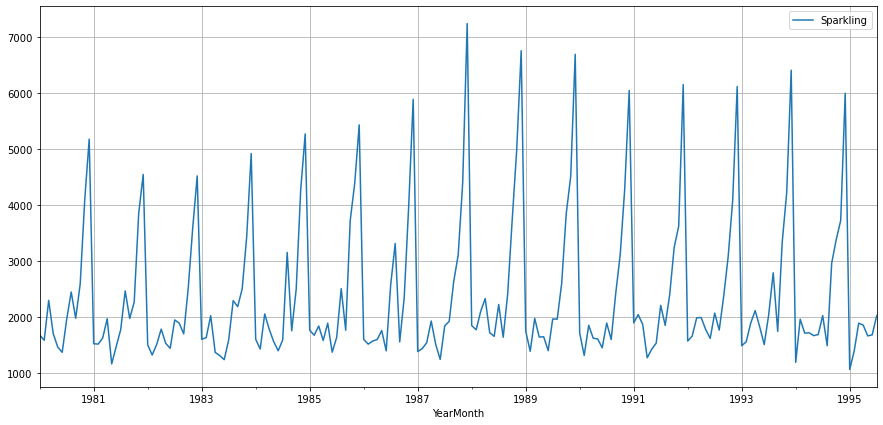

In [30]:
df1.plot()
plt.grid();

In [31]:
df_decade_sum = df1.resample('10Y').sum()
df_decade_sum

,Sparkling
YearMonth,
1980-12-31,28406
1990-12-31,288893
2000-12-31,131953


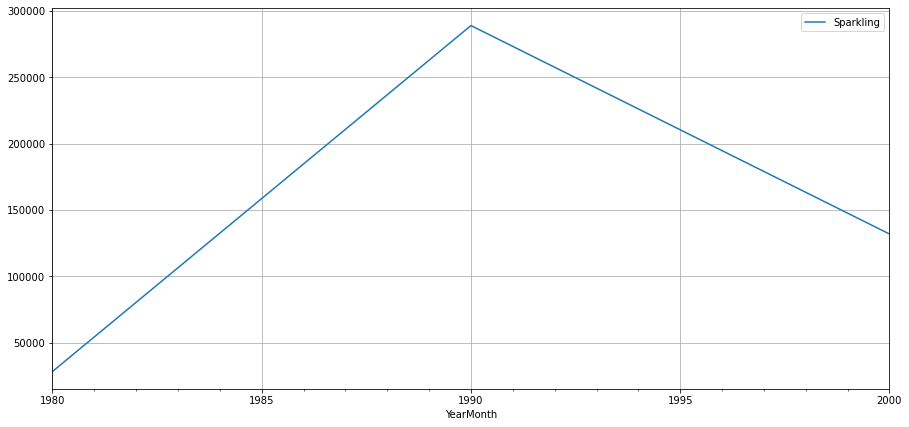

In [32]:
df_decade_sum.plot();
plt.grid()

In [33]:
df1_add_decompose = seasonal_decompose(df1, model = 'additive', period = 12)

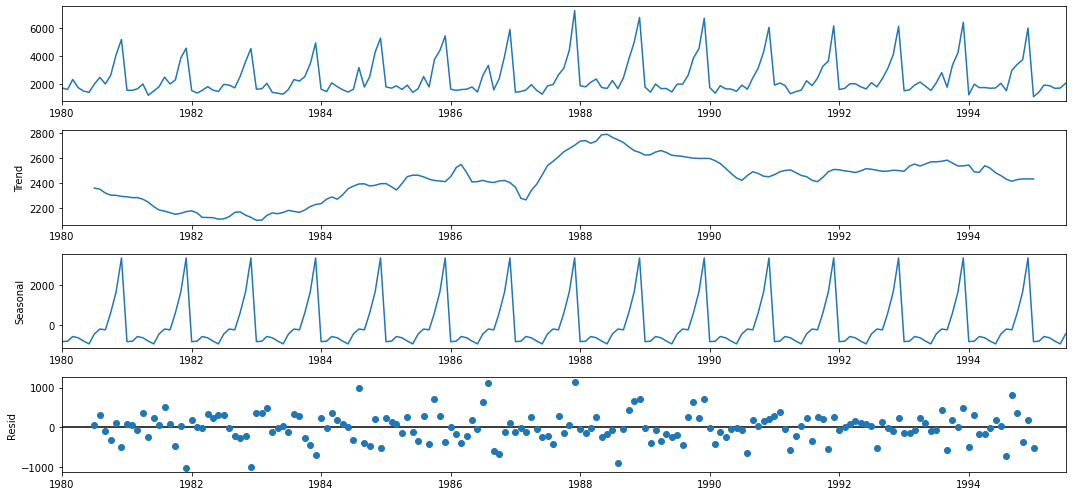

In [34]:
df1_add_decompose.plot()
plt.show()

In [35]:
trend = df1_add_decompose.trend
seasonality = df1_add_decompose.seasonal
residual = df1_add_decompose.resid

In [36]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


In [37]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(10)

YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2431.502265
1980-08-01    2667.332821
1980-09-01    2238.677265
1980-10-01    1996.230043
dtype: float64

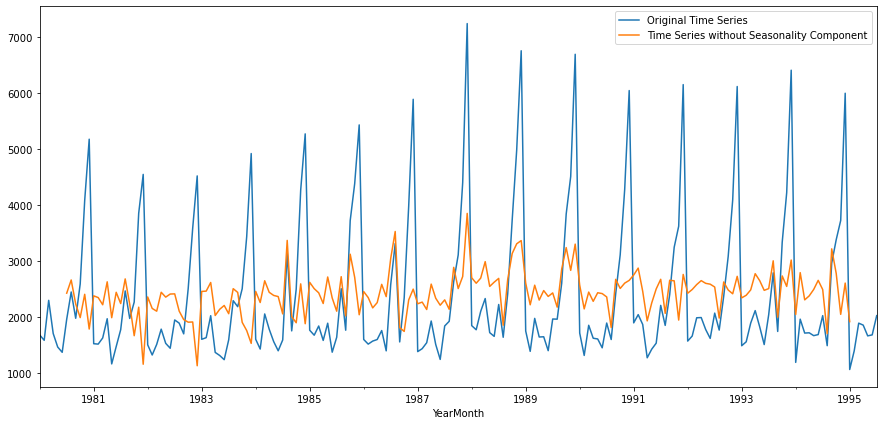

In [38]:
df1.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

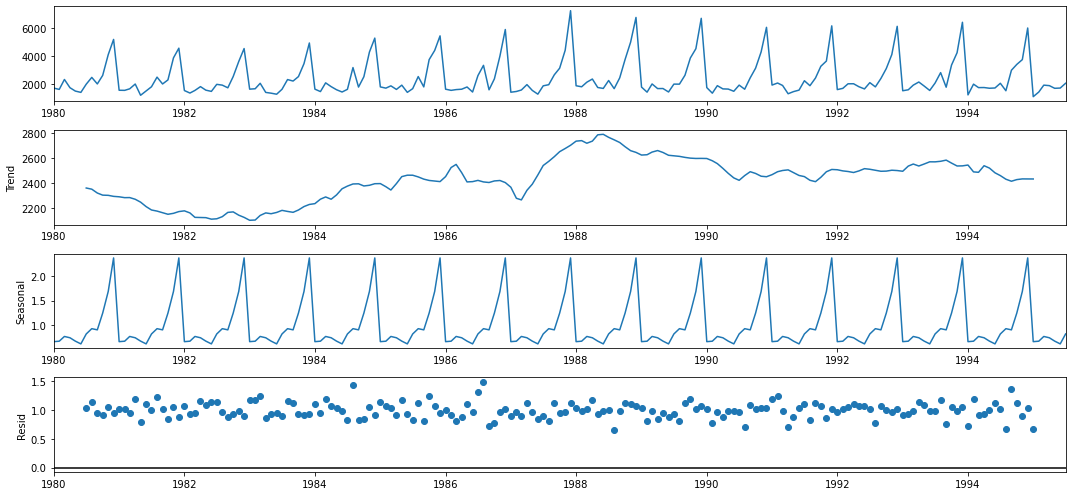

In [39]:
df1_mul_decompose = seasonal_decompose(df1, model = "multiplicative")
df1_mul_decompose.plot()
plt.show()

In [40]:
trend = df1_mul_decompose.trend
seasonality = df1_mul_decompose.seasonal
residual = df1_mul_decompose.resid

In [41]:
print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

In [42]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(10)

YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2361.695896
1980-08-01    2352.468741
1980-09-01    2321.497620
1980-10-01    2304.490847
dtype: float64

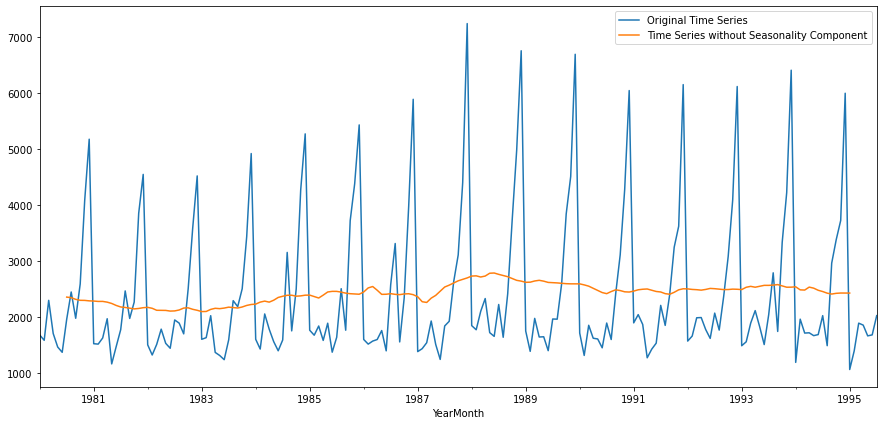

In [43]:
df1.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

In [44]:
train = df1[df1.index<'1991'] 
test = df1[df1.index>='1991']

In [45]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [46]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


Last few rows of Training Data


,Sparkling
YearMonth,
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116
1990-11-01,4286
1990-12-01,6047


First few rows of Test Data


,Sparkling
YearMonth,
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432


Last few rows of Test Data


,Sparkling
YearMonth,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


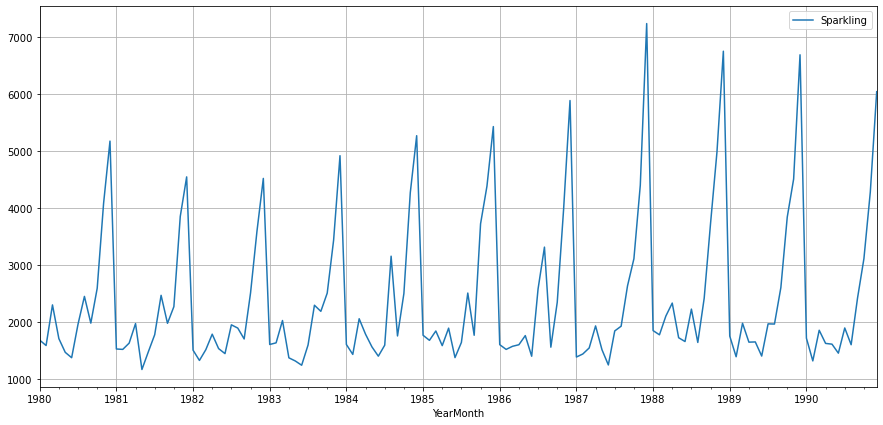

In [47]:
train.plot(grid=True);

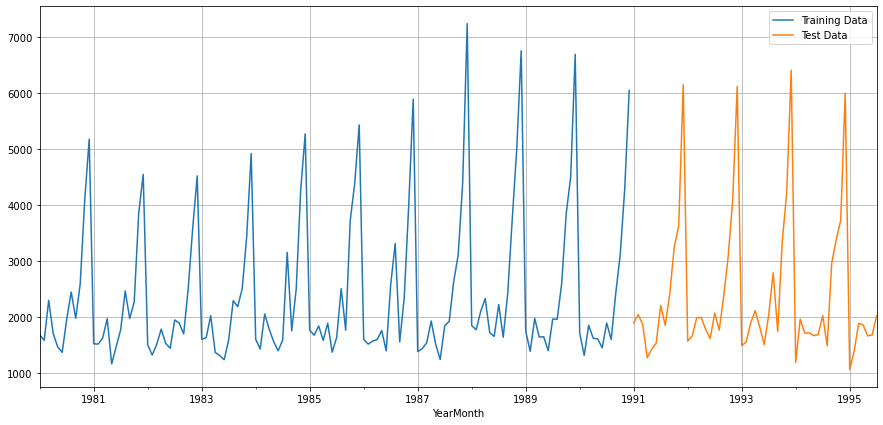

In [48]:
train['Sparkling'].plot()
test['Sparkling'].plot()
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [49]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [50]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [51]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,Sparkling,time
YearMonth,,
1980-01-01,1686,1
1980-02-01,1591,2
1980-03-01,2304,3
1980-04-01,1712,4
1980-05-01,1471,5


Last few rows of Training Data


,Sparkling,time
YearMonth,,
1990-08-01,1605,128
1990-09-01,2424,129
1990-10-01,3116,130
1990-11-01,4286,131
1990-12-01,6047,132


First few rows of Test Data


,Sparkling,time
YearMonth,,
1991-01-01,1902,133
1991-02-01,2049,134
1991-03-01,1874,135
1991-04-01,1279,136
1991-05-01,1432,137


Last few rows of Test Data


,Sparkling,time
YearMonth,,
1995-03-01,1897,183
1995-04-01,1862,184
1995-05-01,1670,185
1995-06-01,1688,186
1995-07-01,2031,187


In [52]:
lr = LinearRegression()

In [53]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False,
                 positive=False)

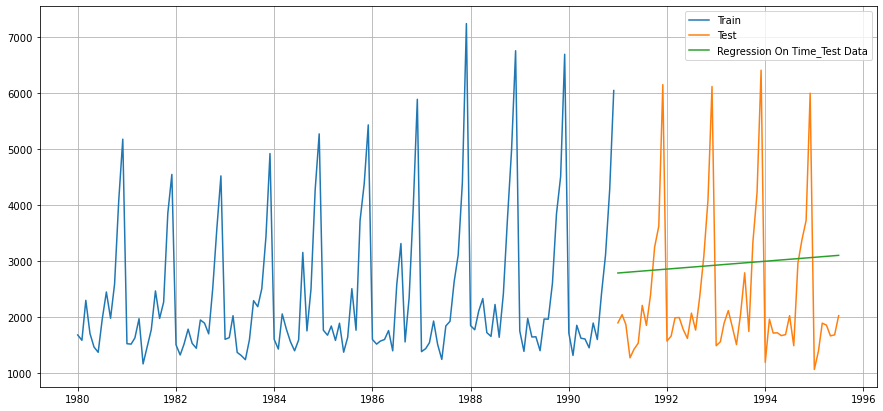

In [54]:
train_predictions_model1 = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [55]:
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135 


In [56]:
resultsDf = pd.DataFrame({'RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,RMSE
RegressionOnTime,1389.135175


In [57]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [58]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

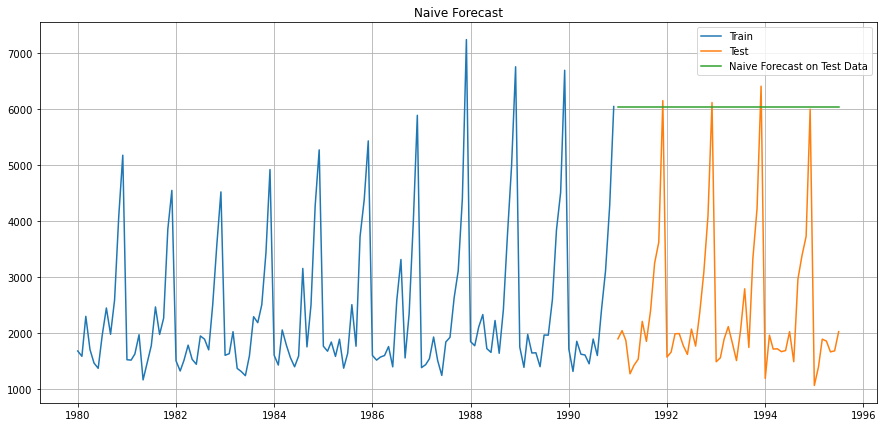

In [59]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [60]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [61]:
resultsDf_2 = pd.DataFrame({'RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352


In [62]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [63]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
YearMonth,,
1991-01-01,1902,2403.780303
1991-02-01,2049,2403.780303
1991-03-01,1874,2403.780303
1991-04-01,1279,2403.780303
1991-05-01,1432,2403.780303


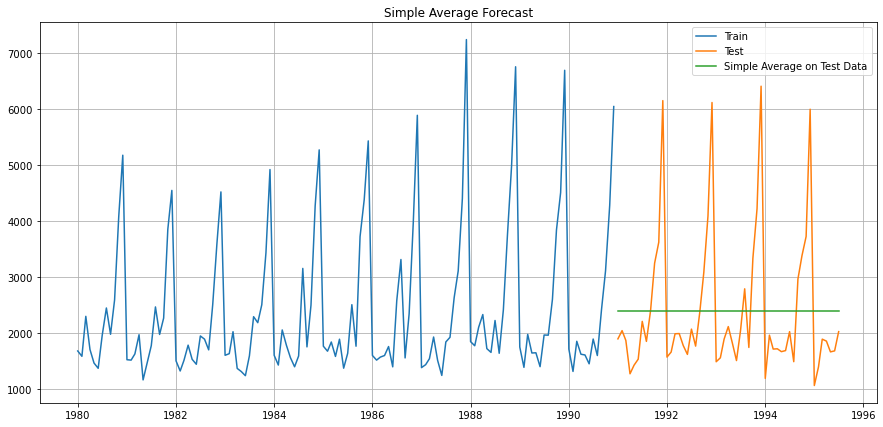

In [64]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [65]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [66]:
resultsDf_3 = pd.DataFrame({'RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804


In [67]:
MovingAverage = df1.copy()
MovingAverage.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [68]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,1686,NaN,NaN,NaN,NaN
1980-02-01,1591,1638.5,NaN,NaN,NaN
1980-03-01,2304,1947.5,NaN,NaN,NaN
1980-04-01,1712,2008.0,1823.25,NaN,NaN
1980-05-01,1471,1591.5,1769.50,NaN,NaN


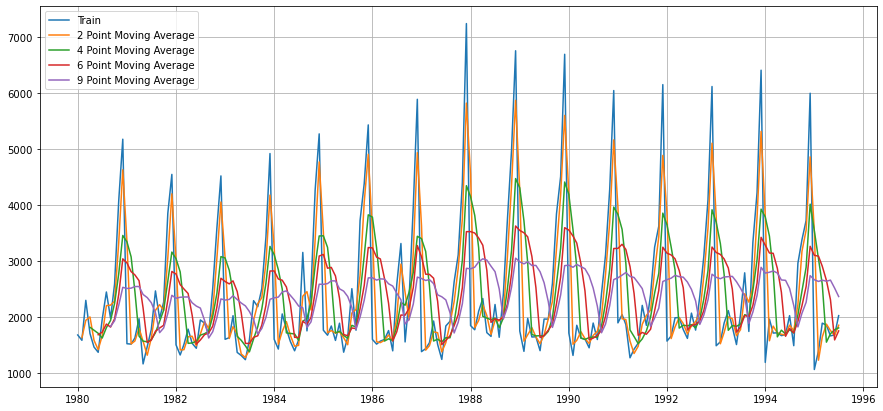

In [69]:
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [70]:
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991] 
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

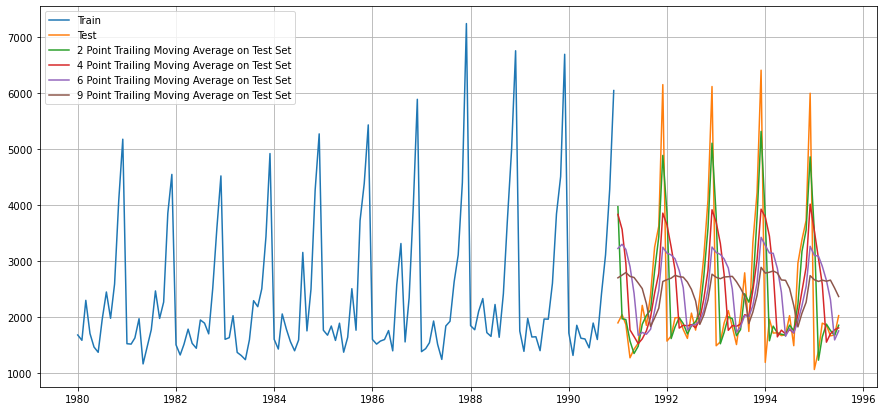

In [71]:
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [72]:
rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))


rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))


rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))


rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278


In [73]:
resultsDf_4 = pd.DataFrame({'RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315


In [74]:
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [75]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [76]:
model_SES_autofit.params

{'smoothing_level': 0.07028442075641193,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1763.8402828521703,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [77]:
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-01    2804.650301
1991-02-01    2804.650301
1991-03-01    2804.650301
1991-04-01    2804.650301
1991-05-01    2804.650301
1991-06-01    2804.650301
1991-07-01    2804.650301
1991-08-01    2804.650301
1991-09-01    2804.650301
1991-10-01    2804.650301
1991-11-01    2804.650301
1991-12-01    2804.650301
1992-01-01    2804.650301
1992-02-01    2804.650301
1992-03-01    2804.650301
1992-04-01    2804.650301
1992-05-01    2804.650301
1992-06-01    2804.650301
1992-07-01    2804.650301
1992-08-01    2804.650301
1992-09-01    2804.650301
1992-10-01    2804.650301
1992-11-01    2804.650301
1992-12-01    2804.650301
1993-01-01    2804.650301
1993-02-01    2804.650301
1993-03-01    2804.650301
1993-04-01    2804.650301
1993-05-01    2804.650301
1993-06-01    2804.650301
1993-07-01    2804.650301
1993-08-01    2804.650301
1993-09-01    2804.650301
1993-10-01    2804.650301
1993-11-01    2804.650301
1993-12-01    2804.650301
1994-01-01    2804.650301
1994-02-01    2804.650301
1994-03-01  

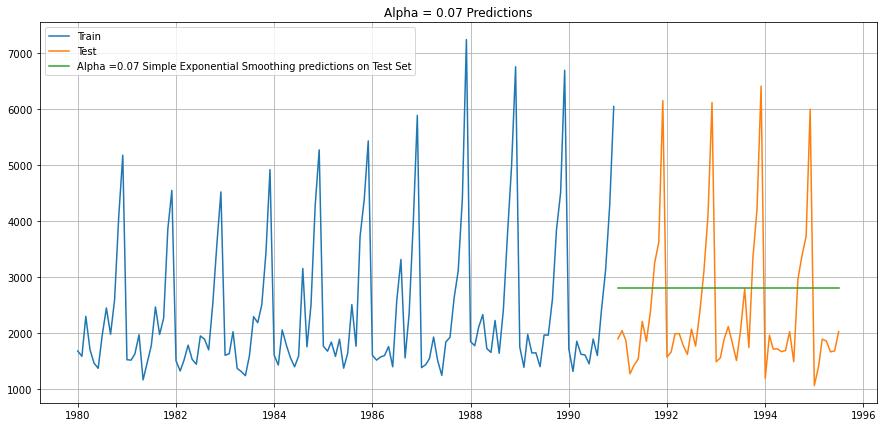

In [78]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.07 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.07 Predictions');

In [79]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [80]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))

print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 1338.0008612252468
SES RMSE (calculated using statsmodels): 1338.0008612252468


In [81]:
resultsDf_1 = pd.DataFrame({'RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.07,SES'])
resultsDf_1

,RMSE
"Alpha=0.07,SES",1338.000861


In [82]:
model_DES = Holt(train,initialization_method='estimated')

model_DES = model_DES.fit()

print('')
print('Holt model Exponential Smoothing Estimated Parameters')
print('')
print(model_DES.params)


Holt model Exponential Smoothing Estimated Parameters

{'smoothing_level': 0.6649999999999999, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.1999999999991, 'initial_trend': 74.87272727272739, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [83]:
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-01    5401.733026
1991-02-01    5476.005230
1991-03-01    5550.277433
1991-04-01    5624.549637
1991-05-01    5698.821840
1991-06-01    5773.094044
1991-07-01    5847.366248
1991-08-01    5921.638451
1991-09-01    5995.910655
1991-10-01    6070.182858
1991-11-01    6144.455062
1991-12-01    6218.727266
1992-01-01    6292.999469
1992-02-01    6367.271673
1992-03-01    6441.543876
1992-04-01    6515.816080
1992-05-01    6590.088284
1992-06-01    6664.360487
1992-07-01    6738.632691
1992-08-01    6812.904894
1992-09-01    6887.177098
1992-10-01    6961.449302
1992-11-01    7035.721505
1992-12-01    7109.993709
1993-01-01    7184.265912
1993-02-01    7258.538116
1993-03-01    7332.810320
1993-04-01    7407.082523
1993-05-01    7481.354727
1993-06-01    7555.626930
1993-07-01    7629.899134
1993-08-01    7704.171338
1993-09-01    7778.443541
1993-10-01    7852.715745
1993-11-01    7926.987948
1993-12-01    8001.260152
1994-01-01    8075.532356
1994-02-01    8149.804559
1994-03-01  

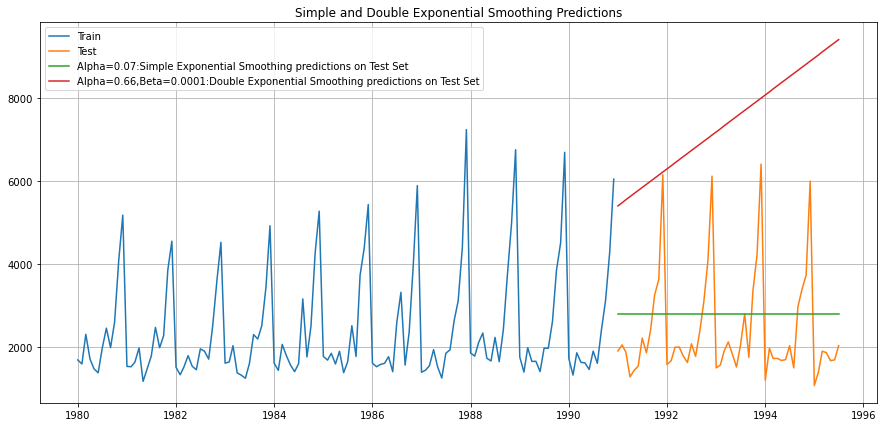

In [84]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.07:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.66,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [85]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 5291.8798332269125


In [86]:
resultsDf_temp = pd.DataFrame({'RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=0.66,Beta=0.0001:DES'])

resultsDf_1 = pd.concat([resultsDf_1, resultsDf_temp])
resultsDf_1

,RMSE
"Alpha=0.07,SES",1338.000861
"Alpha=0.66,Beta=0.0001:DES",5291.879833


In [87]:
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')

model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11127217693511166, 'smoothing_trend': 0.012360783126182025, 'smoothing_seasonal': 0.4607177659431463, 'damping_trend': nan, 'initial_level': 2356.5783078812697, 'initial_trend': -0.018442178724720648, 'initial_seasons': array([-636.23349205, -722.98346399, -398.64349841, -473.43073157,
       -808.42502897, -815.35019273, -384.23061339,   72.99513671,
       -237.44278517,  272.32607144, 1541.37826596, 2590.07759442]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [88]:
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-01    1490.574618
1991-02-01    1204.714535
1991-03-01    1688.941336
1991-04-01    1551.451059
1991-05-01    1461.440697
1991-06-01    1278.907452
1991-07-01    1805.164331
1991-08-01    1679.251719
1991-09-01    2315.687997
1991-10-01    3225.309274
1991-11-01    4299.652749
1991-12-01    6411.161831
1992-01-01    1483.297096
1992-02-01    1197.437013
1992-03-01    1681.663814
1992-04-01    1544.173537
1992-05-01    1454.163175
1992-06-01    1271.629930
1992-07-01    1797.886809
1992-08-01    1671.974197
1992-09-01    2308.410475
1992-10-01    3218.031752
1992-11-01    4292.375227
1992-12-01    6403.884309
1993-01-01    1476.019574
1993-02-01    1190.159491
1993-03-01    1674.386292
1993-04-01    1536.896015
1993-05-01    1446.885653
1993-06-01    1264.352408
1993-07-01    1790.609287
1993-08-01    1664.696675
1993-09-01    2301.132953
1993-10-01    3210.754230
1993-11-01    4285.097705
1993-12-01    6396.606787
1994-01-01    1468.742052
1994-02-01    1182.881969
1994-03-01  

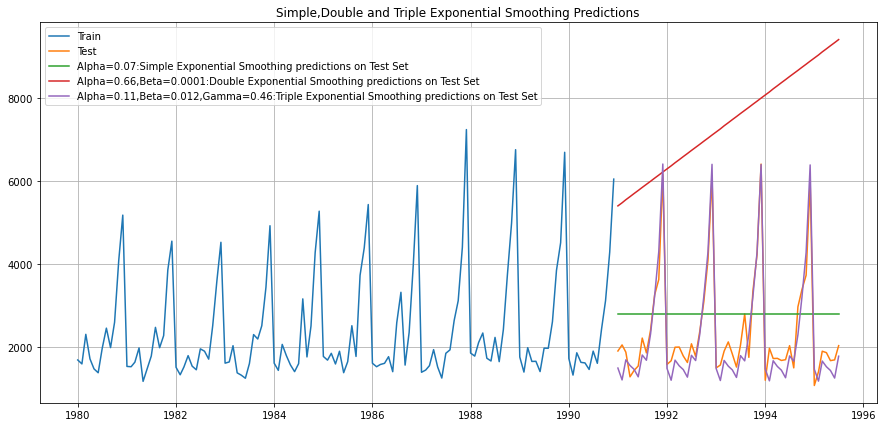

In [89]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.07:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.66,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.11,Beta=0.012,Gamma=0.46:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [90]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 378.6258830010025


In [91]:
resultsDf_temp = pd.DataFrame({'RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.11,Beta=0.012,Gamma=0.46:TES'])

resultsDf_1 = pd.concat([resultsDf_1, resultsDf_temp])
resultsDf_1

,RMSE
"Alpha=0.07,SES",1338.000861
"Alpha=0.66,Beta=0.0001:DES",5291.879833
"Alpha=0.11,Beta=0.012,Gamma=0.46:TES",378.625883


In [92]:
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')

model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11101471561088701, 'smoothing_trend': 0.0493145907614654, 'smoothing_seasonal': 0.36244934537370843, 'damping_trend': nan, 'initial_level': 2356.496908624238, 'initial_trend': -9.809526161838415, 'initial_seasons': array([0.713711  , 0.68278724, 0.90458411, 0.8053878 , 0.65571739,
       0.65388935, 0.88616088, 1.13350811, 0.91894498, 1.21186447,
       1.87099202, 2.37505867]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [93]:
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-01-01    1587.923122
1991-02-01    1356.650595
1991-03-01    1763.350752
1991-04-01    1656.524633
1991-05-01    1542.386930
1991-06-01    1355.481373
1991-07-01    1854.708133
1991-08-01    1820.662236
1991-09-01    2277.677337
1991-10-01    3123.119233
1991-11-01    4130.016390
1991-12-01    5893.151561
1992-01-01    1539.027193
1992-02-01    1314.768627
1992-03-01    1708.772893
1992-04-01    1605.120587
1992-05-01    1494.400631
1992-06-01    1313.200407
1992-07-01    1796.704221
1992-08-01    1763.574290
1992-09-01    2206.072310
1992-10-01    3024.677525
1992-11-01    3999.494123
1992-12-01    5706.416565
1993-01-01    1490.131264
1993-02-01    1272.886659
1993-03-01    1654.195033
1993-04-01    1553.716542
1993-05-01    1446.414333
1993-06-01    1270.919441
1993-07-01    1738.700308
1993-08-01    1706.486345
1993-09-01    2134.467283
1993-10-01    2926.235817
1993-11-01    3868.971855
1993-12-01    5519.681569
1994-01-01    1441.235336
1994-02-01    1231.004691
1994-03-01  

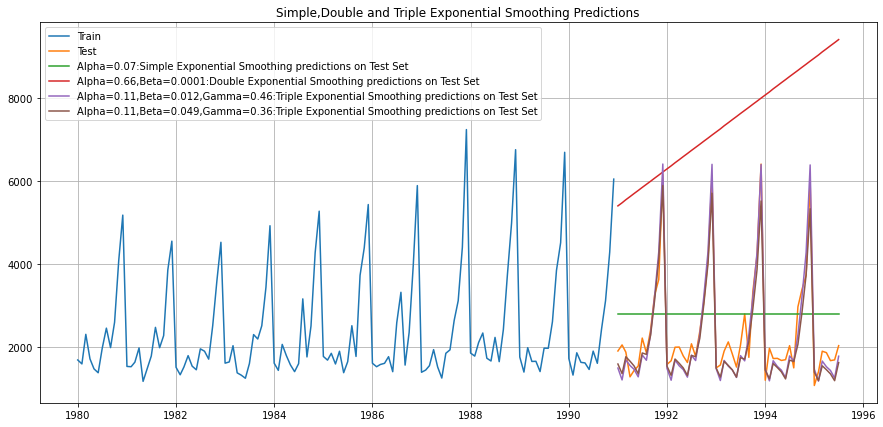

In [94]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.07:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.66,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.11,Beta=0.012,Gamma=0.46:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.11,Beta=0.049,Gamma=0.36:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [95]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 402.93617908586907


In [96]:
resultsDf_temp = pd.DataFrame({'RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.11,Beta=0.049,Gamma=0.36:TES'])

resultsDf_1 = pd.concat([resultsDf_1, resultsDf_temp])
resultsDf_1

,RMSE
"Alpha=0.07,SES",1338.000861
"Alpha=0.66,Beta=0.0001:DES",5291.879833
"Alpha=0.11,Beta=0.012,Gamma=0.46:TES",378.625883
"Alpha=0.11,Beta=0.049,Gamma=0.36:TES",402.936179


In [97]:
resultsDf = pd.concat([resultsDf, resultsDf_1])
resultsDf

,RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha=0.07,SES",1338.000861
"Alpha=0.66,Beta=0.0001:DES",5291.879833
"Alpha=0.11,Beta=0.012,Gamma=0.46:TES",378.625883


In [98]:
dftest = adfuller(df1,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.798
DF test p-value is 0.7055958459932692
Number of lags used 12


In [99]:
dftest = adfuller(df1.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10


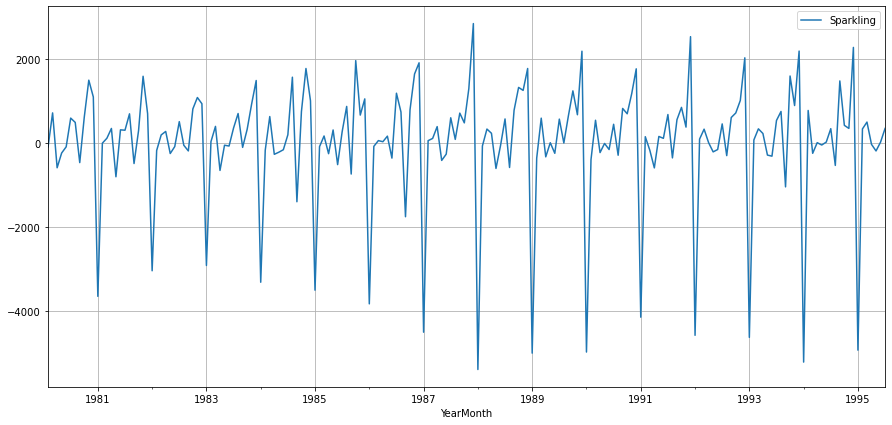

In [100]:
df1.diff().dropna().plot(grid=True);

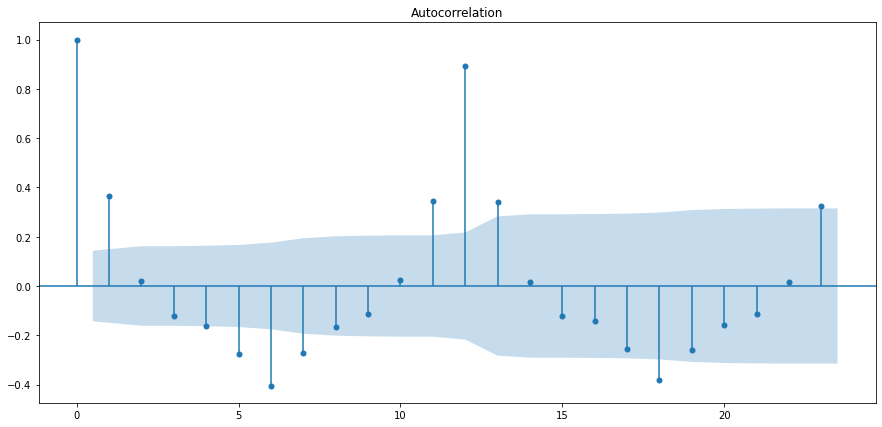

In [101]:
plot_acf(df1, alpha = 0.05);

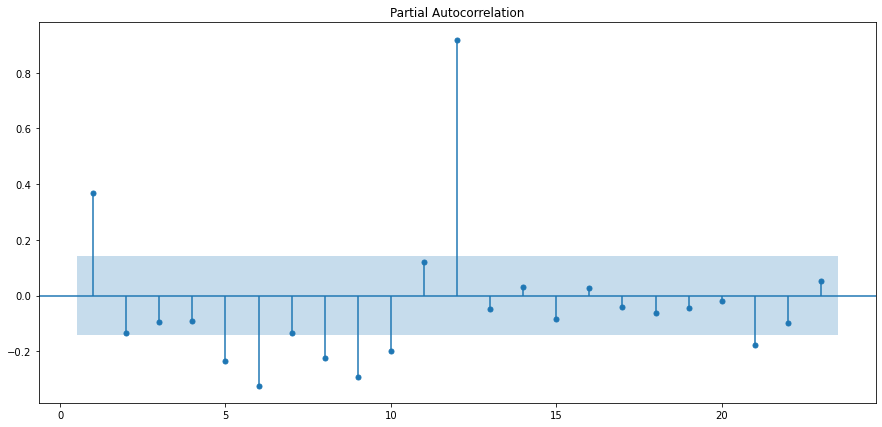

In [102]:
plot_pacf(df1, zero = False, alpha = 0.05);

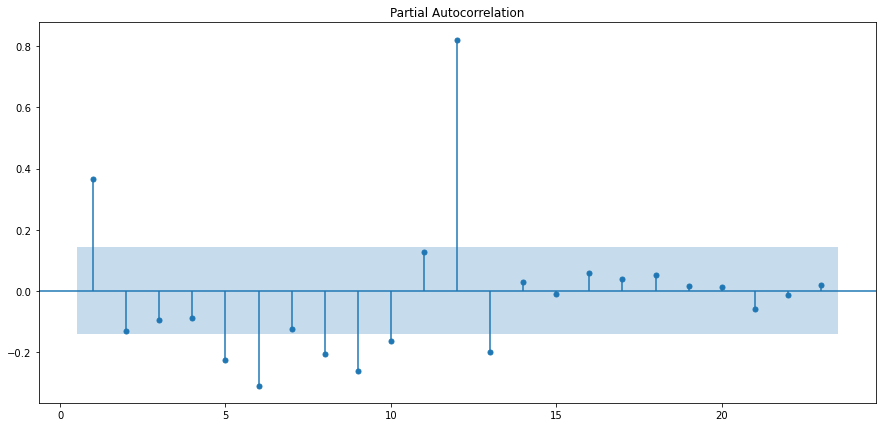

In [103]:
plot_pacf(df1, zero = False, alpha = 0.05, method = 'ywmle');

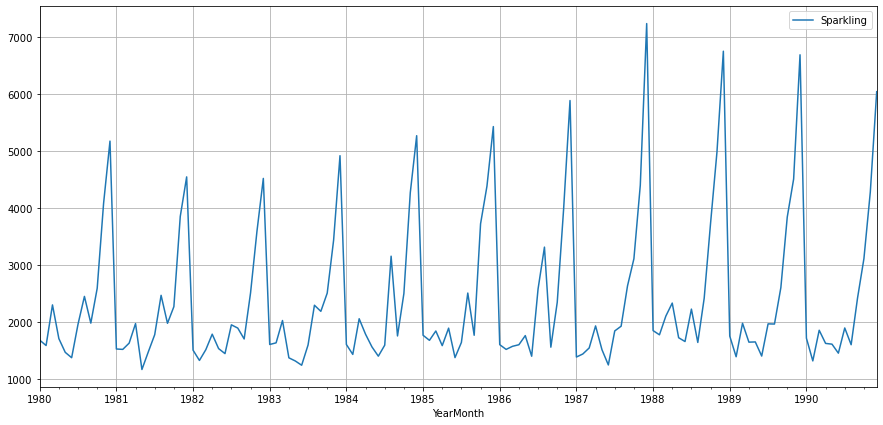

In [104]:
train.plot(grid=True);

In [105]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.062
DF test p-value is 0.5674110388593684
Number of lags used 12


In [106]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -7.968
DF test p-value is 8.47921065551504e-11
Number of lags used 11


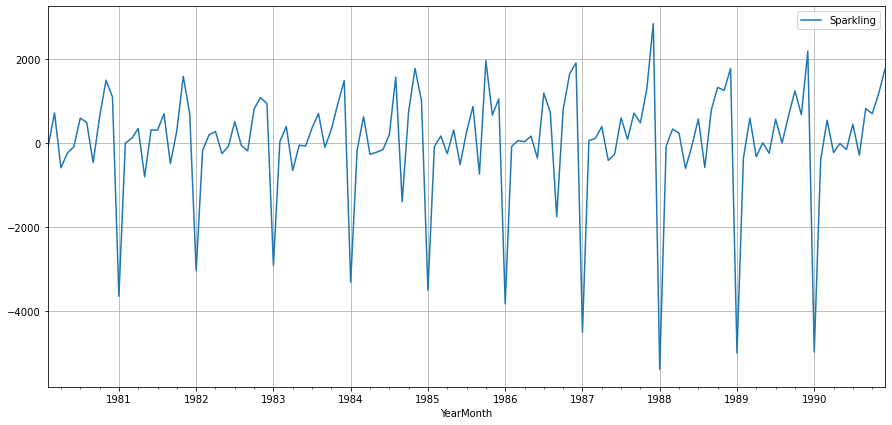

In [107]:
train.diff().dropna().plot(grid=True);

In [108]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


In [109]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [110]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [111]:
for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015592223
ARIMA(0, 1, 2) - AIC:2234.4083231226628
ARIMA(0, 1, 3) - AIC:2233.994857735581
ARIMA(1, 1, 0) - AIC:2266.6085393190097
ARIMA(1, 1, 1) - AIC:2235.7550946704996
ARIMA(1, 1, 2) - AIC:2234.527200452125
ARIMA(1, 1, 3) - AIC:2235.6078154783027
ARIMA(2, 1, 0) - AIC:2260.36574396809
ARIMA(2, 1, 1) - AIC:2233.777626228905
ARIMA(2, 1, 2) - AIC:2213.509212416925


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:2232.8112113956195
ARIMA(3, 1, 0) - AIC:2257.7233789979387
ARIMA(3, 1, 1) - AIC:2235.4988992974854


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 2) - AIC:2230.825008517658
ARIMA(3, 1, 3) - AIC:2221.4616892285576


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [112]:
ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
10,"(2, 1, 2)",2213.509212
15,"(3, 1, 3)",2221.461689
14,"(3, 1, 2)",2230.825009
11,"(2, 1, 3)",2232.811211
9,"(2, 1, 1)",2233.777626


In [113]:
auto_ARIMA = ARIMA(train, order=(2,1,2))
results_auto_ARIMA = auto_ARIMA.fit()
print(results_auto_ARIMA.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Tue, 13 Dec 2022   AIC                           2213.509
Time:                        06:03:46   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.216      0.0

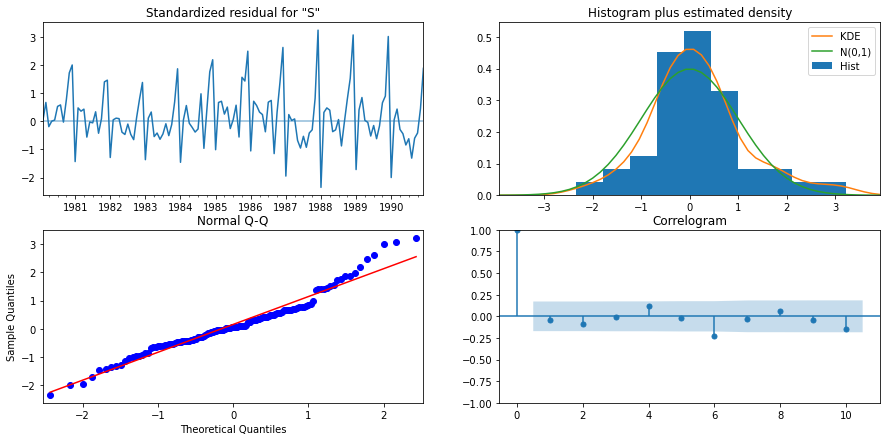

In [114]:
results_auto_ARIMA.plot_diagnostics();

In [115]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [116]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [117]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1299.9798208324635 
MAPE: 47.09997350867749


In [118]:
resultsDf2 = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,2)'])
resultsDf2

,RMSE,MAPE
"ARIMA(2,1,2)",1299.979821,47.099974


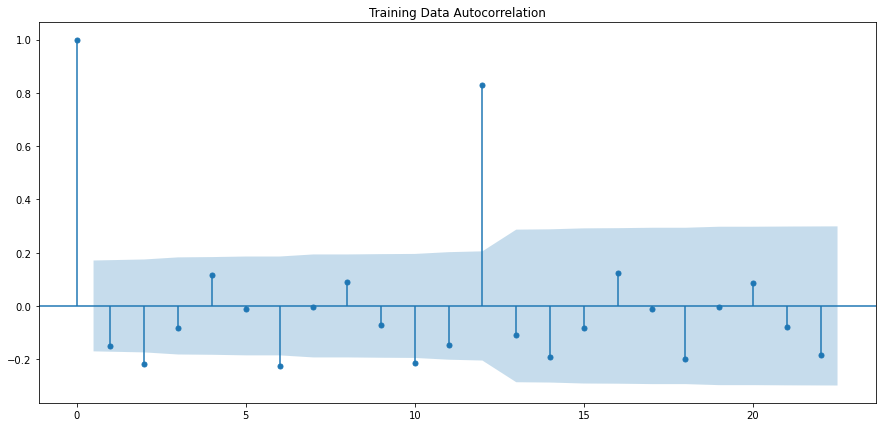

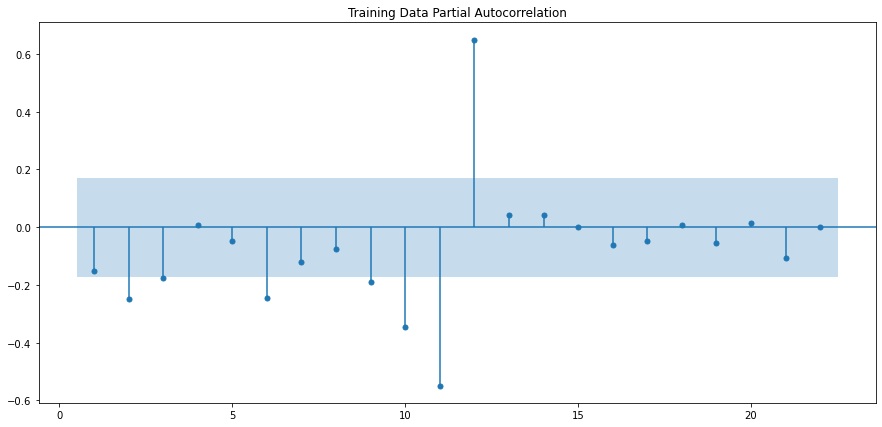

In [119]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

In [120]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(3,1,3))
results_manual_ARIMA = manual_ARIMA.fit()
print(results_manual_ARIMA.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -1103.731
Date:                Tue, 13 Dec 2022   AIC                           2221.462
Time:                        06:03:48   BIC                           2241.588
Sample:                    01-01-1980   HQIC                          2229.640
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4758      0.143      3.320      0.001       0.195       0.757
ar.L2         -0.9865      0.052    -18.806      0.000      -1.089      -0.884
ar.L3          0.4821      0.117      4.115      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


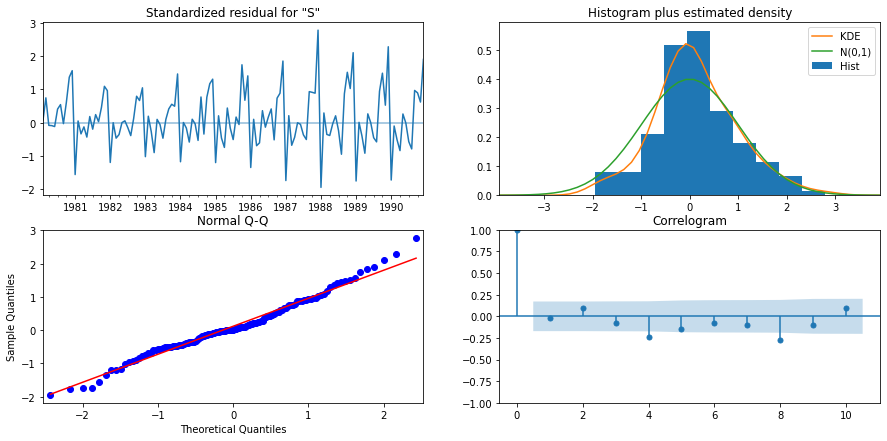

In [121]:
results_manual_ARIMA.plot_diagnostics();

In [122]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [123]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1228.3563979444584 
MAPE: 39.4685313069042


In [124]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(3,1,3)'])
resultsDf2 = pd.concat([resultsDf2,temp_resultsDf])
resultsDf2

,RMSE,MAPE
"ARIMA(2,1,2)",1299.979821,47.099974
"ARIMA(3,1,3)",1228.356398,39.468531


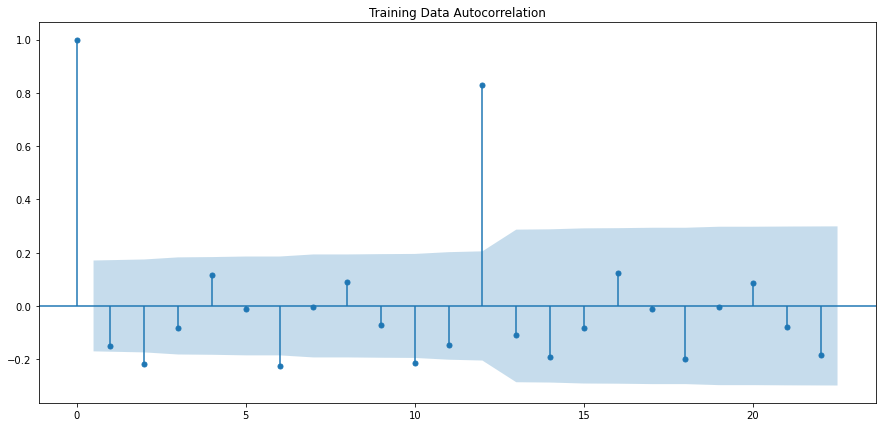

In [125]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

In [126]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (0, 1, 3)(0, 1, 3, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (1, 1, 3)(1, 1, 3, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (2, 1, 3)(2, 1, 3, 12)
Model: (3, 1, 0)(3, 1, 0, 12)
Model: (3, 1, 1)(3, 1, 1, 12)
Model: (3, 1, 2)(3, 1, 2, 12)
Model: (3, 1, 3)(3, 1, 3, 12)


In [127]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [128]:
for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1822.982485206384
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:1626.8626334678277
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:1452.677357426062


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(0, 1, 3, 12) - AIC:2983.0860020053024
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:1646.377816766144
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:1628.324390818717
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:1454.5289621307973


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 1, 3, 12) - AIC:3506.24724401915
SARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:1466.6211360755017
SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:1468.5000981866647
SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:1455.991155363833


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 1, 3, 12) - AIC:3216.1155620861928
SARIMA(0, 1, 0)x(3, 1, 0, 12) - AIC:1289.239819743992
SARIMA(0, 1, 0)x(3, 1, 1, 12) - AIC:1291.2448875094224
SARIMA(0, 1, 0)x(3, 1, 2, 12) - AIC:1288.6070380307144


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 1, 3, 12) - AIC:4044.235035860039
SARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:1760.6565719828457
SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:1569.6639234229967
SARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC:1399.1083846680508


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 1, 3, 12) - AIC:2923.4389742426583
SARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:1602.859481902387
SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:1570.855025919579
SARIMA(0, 1, 1)x(1, 1, 2, 12) - AIC:1400.6709524137211


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 1, 3, 12) - AIC:3568.0882072947347
SARIMA(0, 1, 1)x(2, 1, 0, 12) - AIC:1428.244881115508
SARIMA(0, 1, 1)x(2, 1, 1, 12) - AIC:1429.6168027963313
SARIMA(0, 1, 1)x(2, 1, 2, 12) - AIC:1402.6385888474351


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 1, 3, 12) - AIC:3593.29021993928
SARIMA(0, 1, 1)x(3, 1, 0, 12) - AIC:1255.578454293161
SARIMA(0, 1, 1)x(3, 1, 1, 12) - AIC:1257.455856859062
SARIMA(0, 1, 1)x(3, 1, 2, 12) - AIC:1258.2925125564814


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 1, 3, 12) - AIC:3672.995109990017
SARIMA(0, 1, 2)x(0, 1, 0, 12) - AIC:1741.3207220431727
SARIMA(0, 1, 2)x(0, 1, 1, 12) - AIC:1554.7429039622357
SARIMA(0, 1, 2)x(0, 1, 2, 12) - AIC:1382.4842540786353
SARIMA(0, 1, 2)x(0, 1, 3, 12) - AIC:3142.014156225644
SARIMA(0, 1, 2)x(1, 1, 0, 12) - AIC:1601.7587293001154
SARIMA(0, 1, 2)x(1, 1, 1, 12) - AIC:1556.155971616442
SARIMA(0, 1, 2)x(1, 1, 2, 12) - AIC:1384.3988672020057
SARIMA(0, 1, 2)x(1, 1, 3, 12) - AIC:3186.0730361012993
SARIMA(0, 1, 2)x(2, 1, 0, 12) - AIC:1427.0773414538965
SARIMA(0, 1, 2)x(2, 1, 1, 12) - AIC:1428.5534767508957
SARIMA(0, 1, 2)x(2, 1, 2, 12) - AIC:1386.0237342779255


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 1, 3, 12) - AIC:3060.3190388776566
SARIMA(0, 1, 2)x(3, 1, 0, 12) - AIC:1254.6525579264649
SARIMA(0, 1, 2)x(3, 1, 1, 12) - AIC:1256.9866634018992
SARIMA(0, 1, 2)x(3, 1, 2, 12) - AIC:1257.4253258676124
SARIMA(0, 1, 2)x(3, 1, 3, 12) - AIC:3285.7013294974877
SARIMA(0, 1, 3)x(0, 1, 0, 12) - AIC:1727.2607378275302
SARIMA(0, 1, 3)x(0, 1, 1, 12) - AIC:1540.794818431293
SARIMA(0, 1, 3)x(0, 1, 2, 12) - AIC:1369.9603671034645
SARIMA(0, 1, 3)x(0, 1, 3, 12) - AIC:2564.6766360152665
SARIMA(0, 1, 3)x(1, 1, 0, 12) - AIC:1602.1924100607864
SARIMA(0, 1, 3)x(1, 1, 1, 12) - AIC:1542.6814540458133
SARIMA(0, 1, 3)x(1, 1, 2, 12) - AIC:1371.7363271382242


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(1, 1, 3, 12) - AIC:3474.4320205004897
SARIMA(0, 1, 3)x(2, 1, 0, 12) - AIC:1428.389685687739
SARIMA(0, 1, 3)x(2, 1, 1, 12) - AIC:1429.8265181294373
SARIMA(0, 1, 3)x(2, 1, 2, 12) - AIC:1373.452473175466


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 1, 3, 12) - AIC:3603.8598037518727
SARIMA(0, 1, 3)x(3, 1, 0, 12) - AIC:1256.0020281098848
SARIMA(0, 1, 3)x(3, 1, 1, 12) - AIC:1258.074761357641
SARIMA(0, 1, 3)x(3, 1, 2, 12) - AIC:1258.9452629339944


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 1, 3, 12) - AIC:3249.543170655801
SARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:1810.9513015567375
SARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:1613.740703341053
SARIMA(1, 1, 0)x(0, 1, 2, 12) - AIC:1441.4259994233964
SARIMA(1, 1, 0)x(0, 1, 3, 12) - AIC:3241.608239941446
SARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:1619.6703363510771
SARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:1615.7404485275945
SARIMA(1, 1, 0)x(1, 1, 2, 12) - AIC:1443.1035528175214


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 1, 3, 12) - AIC:3231.6011838786
SARIMA(1, 1, 0)x(2, 1, 0, 12) - AIC:1440.574162809936
SARIMA(1, 1, 0)x(2, 1, 1, 12) - AIC:1442.5059371251305
SARIMA(1, 1, 0)x(2, 1, 2, 12) - AIC:1444.4274245939505


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 1, 3, 12) - AIC:3981.2051403240894
SARIMA(1, 1, 0)x(3, 1, 0, 12) - AIC:1265.1747644704728
SARIMA(1, 1, 0)x(3, 1, 1, 12) - AIC:1267.1592027274555
SARIMA(1, 1, 0)x(3, 1, 2, 12) - AIC:1263.9849693923586


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 1, 3, 12) - AIC:4060.014371641154
SARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:1757.3654162744572
SARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:1569.3827366812814
SARIMA(1, 1, 1)x(0, 1, 2, 12) - AIC:1398.7561672216966


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(0, 1, 3, 12) - AIC:3155.16936923868
SARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:1588.0655672689488
SARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:1570.6724644580804
SARIMA(1, 1, 1)x(1, 1, 2, 12) - AIC:1400.4523886152124


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(1, 1, 3, 12) - AIC:3278.0815593667244
SARIMA(1, 1, 1)x(2, 1, 0, 12) - AIC:1413.567985961516
SARIMA(1, 1, 1)x(2, 1, 1, 12) - AIC:1414.8736681604414
SARIMA(1, 1, 1)x(2, 1, 2, 12) - AIC:1402.2732672815557


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(2, 1, 3, 12) - AIC:3276.3949096057686
SARIMA(1, 1, 1)x(3, 1, 0, 12) - AIC:1240.8275546143507
SARIMA(1, 1, 1)x(3, 1, 1, 12) - AIC:1242.6640988862341
SARIMA(1, 1, 1)x(3, 1, 2, 12) - AIC:1243.1145005378587


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(3, 1, 3, 12) - AIC:3095.8329823228796
SARIMA(1, 1, 2)x(0, 1, 0, 12) - AIC:1742.7366275438228
SARIMA(1, 1, 2)x(0, 1, 1, 12) - AIC:1554.9584139022031
SARIMA(1, 1, 2)x(0, 1, 2, 12) - AIC:1382.3477800329856
SARIMA(1, 1, 2)x(0, 1, 3, 12) - AIC:3160.5060823968315
SARIMA(1, 1, 2)x(1, 1, 0, 12) - AIC:1585.7860900921396
SARIMA(1, 1, 2)x(1, 1, 1, 12) - AIC:1556.1300441713283
SARIMA(1, 1, 2)x(1, 1, 2, 12) - AIC:1384.137873862399


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 1, 3, 12) - AIC:3122.7538686890616
SARIMA(1, 1, 2)x(2, 1, 0, 12) - AIC:1411.9924109673505
SARIMA(1, 1, 2)x(2, 1, 1, 12) - AIC:1413.5918294292533
SARIMA(1, 1, 2)x(2, 1, 2, 12) - AIC:1385.6887207714424


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 1, 3, 12) - AIC:3155.739075486991
SARIMA(1, 1, 2)x(3, 1, 0, 12) - AIC:1240.4397939412343
SARIMA(1, 1, 2)x(3, 1, 1, 12) - AIC:1242.3340377999677
SARIMA(1, 1, 2)x(3, 1, 2, 12) - AIC:1242.9811910743986


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 1, 3, 12) - AIC:3257.453078233203
SARIMA(1, 1, 3)x(0, 1, 0, 12) - AIC:1727.0466394219518
SARIMA(1, 1, 3)x(0, 1, 1, 12) - AIC:1541.6027947004654
SARIMA(1, 1, 3)x(0, 1, 2, 12) - AIC:1370.6605716693678
SARIMA(1, 1, 3)x(0, 1, 3, 12) - AIC:5734.038357304491
SARIMA(1, 1, 3)x(1, 1, 0, 12) - AIC:1587.782481939768
SARIMA(1, 1, 3)x(1, 1, 1, 12) - AIC:1544.6047622976587
SARIMA(1, 1, 3)x(1, 1, 2, 12) - AIC:1372.2143069547587
SARIMA(1, 1, 3)x(1, 1, 3, 12) - AIC:6121.873232077235
SARIMA(1, 1, 3)x(2, 1, 0, 12) - AIC:1413.9496333280165
SARIMA(1, 1, 3)x(2, 1, 1, 12) - AIC:1415.5604694480285
SARIMA(1, 1, 3)x(2, 1, 2, 12) - AIC:1373.71530161806
SARIMA(1, 1, 3)x(2, 1, 3, 12) - AIC:6137.71539745384
SARIMA(1, 1, 3)x(3, 1, 0, 12) - AIC:1242.8330948723255
SARIMA(1, 1, 3)x(3, 1, 1, 12) - AIC:1244.822746770223
SARIMA(1, 1, 3)x(3, 1, 2, 12) - AIC:1245.4466245502456
SARIMA(1, 1, 3)x(3, 1, 3, 12) - AIC:5044.888027354982
SARIMA(2, 1, 0)x(0, 1, 0, 12) - AIC:1779.6359486658962
SARIMA(2, 1, 0)x(0, 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 1, 3, 12) - AIC:3175.163412409626
SARIMA(2, 1, 0)x(1, 1, 0, 12) - AIC:1590.6714007730457
SARIMA(2, 1, 0)x(1, 1, 1, 12) - AIC:1587.5144246574623
SARIMA(2, 1, 0)x(1, 1, 2, 12) - AIC:1431.1873135881306


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(1, 1, 3, 12) - AIC:3235.115449035695
SARIMA(2, 1, 0)x(2, 1, 0, 12) - AIC:1413.6736725425565
SARIMA(2, 1, 0)x(2, 1, 1, 12) - AIC:1415.6324295193058
SARIMA(2, 1, 0)x(2, 1, 2, 12) - AIC:1417.3668472985332


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(2, 1, 3, 12) - AIC:3331.978366852566
SARIMA(2, 1, 0)x(3, 1, 0, 12) - AIC:1240.891751219928
SARIMA(2, 1, 0)x(3, 1, 1, 12) - AIC:1242.8745815841291
SARIMA(2, 1, 0)x(3, 1, 2, 12) - AIC:1242.799170336969


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 1, 3, 12) - AIC:3365.904923628756
SARIMA(2, 1, 1)x(0, 1, 0, 12) - AIC:1758.5616376866571
SARIMA(2, 1, 1)x(0, 1, 1, 12) - AIC:1570.1755922610753
SARIMA(2, 1, 1)x(0, 1, 2, 12) - AIC:1400.209858180731


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 1, 3, 12) - AIC:3178.719478659194
SARIMA(2, 1, 1)x(1, 1, 0, 12) - AIC:1574.3724067255678
SARIMA(2, 1, 1)x(1, 1, 1, 12) - AIC:1571.8577388007504
SARIMA(2, 1, 1)x(1, 1, 2, 12) - AIC:1401.9104199707435


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(1, 1, 3, 12) - AIC:3472.572029701604
SARIMA(2, 1, 1)x(2, 1, 0, 12) - AIC:1400.9854069823728
SARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:1401.9924735487061
SARIMA(2, 1, 1)x(2, 1, 2, 12) - AIC:1403.818345552987
SARIMA(2, 1, 1)x(2, 1, 3, 12) - AIC:3341.749596947907
SARIMA(2, 1, 1)x(3, 1, 0, 12) - AIC:1228.3132766082683
SARIMA(2, 1, 1)x(3, 1, 1, 12) - AIC:1230.1483342056858
SARIMA(2, 1, 1)x(3, 1, 2, 12) - AIC:1230.759782203476


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 1, 3, 12) - AIC:3410.1336029626477
SARIMA(2, 1, 2)x(0, 1, 0, 12) - AIC:1742.2930711386323
SARIMA(2, 1, 2)x(0, 1, 1, 12) - AIC:1556.9467324125885
SARIMA(2, 1, 2)x(0, 1, 2, 12) - AIC:1384.317618064532


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 1, 3, 12) - AIC:2011.4123387716438
SARIMA(2, 1, 2)x(1, 1, 0, 12) - AIC:1573.1168644412323
SARIMA(2, 1, 2)x(1, 1, 1, 12) - AIC:1558.1200892478819
SARIMA(2, 1, 2)x(1, 1, 2, 12) - AIC:1386.097242019365


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 1, 3, 12) - AIC:2791.4227847186658
SARIMA(2, 1, 2)x(2, 1, 0, 12) - AIC:1399.775633999168
SARIMA(2, 1, 2)x(2, 1, 1, 12) - AIC:1401.1832161217526
SARIMA(2, 1, 2)x(2, 1, 2, 12) - AIC:1387.6277846296102


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 1, 3, 12) - AIC:2292.247741641267
SARIMA(2, 1, 2)x(3, 1, 0, 12) - AIC:1228.3971677411384
SARIMA(2, 1, 2)x(3, 1, 1, 12) - AIC:1230.2093707076735
SARIMA(2, 1, 2)x(3, 1, 2, 12) - AIC:1230.685681954404


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 1, 3, 12) - AIC:2858.1477993904946
SARIMA(2, 1, 3)x(0, 1, 0, 12) - AIC:1729.008041502327
SARIMA(2, 1, 3)x(0, 1, 1, 12) - AIC:1539.8879476659451
SARIMA(2, 1, 3)x(0, 1, 2, 12) - AIC:1368.1431625257144
SARIMA(2, 1, 3)x(0, 1, 3, 12) - AIC:6017.7761311106515
SARIMA(2, 1, 3)x(1, 1, 0, 12) - AIC:1571.5669140672478
SARIMA(2, 1, 3)x(1, 1, 1, 12) - AIC:1541.4636033632942
SARIMA(2, 1, 3)x(1, 1, 2, 12) - AIC:1369.7747273239574


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 1, 3, 12) - AIC:5727.53524188879
SARIMA(2, 1, 3)x(2, 1, 0, 12) - AIC:1396.0596575331888
SARIMA(2, 1, 3)x(2, 1, 1, 12) - AIC:1397.8640318215596
SARIMA(2, 1, 3)x(2, 1, 2, 12) - AIC:1369.133721585777
SARIMA(2, 1, 3)x(2, 1, 3, 12) - AIC:22.0
SARIMA(2, 1, 3)x(3, 1, 0, 12) - AIC:1229.4698529158402
SARIMA(2, 1, 3)x(3, 1, 1, 12) - AIC:1227.8251448504368
SARIMA(2, 1, 3)x(3, 1, 2, 12) - AIC:1229.1523500290814
SARIMA(2, 1, 3)x(3, 1, 3, 12) - AIC:6226.233553159212
SARIMA(3, 1, 0)x(0, 1, 0, 12) - AIC:1761.4099815082702
SARIMA(3, 1, 0)x(0, 1, 1, 12) - AIC:1600.5023389441324
SARIMA(3, 1, 0)x(0, 1, 2, 12) - AIC:1430.3126536702584


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(0, 1, 3, 12) - AIC:2815.9126121721065
SARIMA(3, 1, 0)x(1, 1, 0, 12) - AIC:1576.8309567177048
SARIMA(3, 1, 0)x(1, 1, 1, 12) - AIC:1574.5127601474126
SARIMA(3, 1, 0)x(1, 1, 2, 12) - AIC:1431.9534628515316


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(1, 1, 3, 12) - AIC:3305.0586947767065
SARIMA(3, 1, 0)x(2, 1, 0, 12) - AIC:1398.5970048038416
SARIMA(3, 1, 0)x(2, 1, 1, 12) - AIC:1400.474080360001
SARIMA(3, 1, 0)x(2, 1, 2, 12) - AIC:1402.5527499414518


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(2, 1, 3, 12) - AIC:2942.664713445138
SARIMA(3, 1, 0)x(3, 1, 0, 12) - AIC:1227.4630824824671
SARIMA(3, 1, 0)x(3, 1, 1, 12) - AIC:1229.4324419590412
SARIMA(3, 1, 0)x(3, 1, 2, 12) - AIC:1229.1153342159737


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 1, 3, 12) - AIC:3019.9670120572227
SARIMA(3, 1, 1)x(0, 1, 0, 12) - AIC:1744.6939375469262
SARIMA(3, 1, 1)x(0, 1, 1, 12) - AIC:1572.0715279675157
SARIMA(3, 1, 1)x(0, 1, 2, 12) - AIC:1401.6807316913246


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(0, 1, 3, 12) - AIC:3180.1002226027804
SARIMA(3, 1, 1)x(1, 1, 0, 12) - AIC:1561.8477975464205
SARIMA(3, 1, 1)x(1, 1, 1, 12) - AIC:1559.6931631943903
SARIMA(3, 1, 1)x(1, 1, 2, 12) - AIC:1403.3936812920476


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(1, 1, 3, 12) - AIC:3131.759256593169
SARIMA(3, 1, 1)x(2, 1, 0, 12) - AIC:1385.8871646619727
SARIMA(3, 1, 1)x(2, 1, 1, 12) - AIC:1387.5203747556525
SARIMA(3, 1, 1)x(2, 1, 2, 12) - AIC:1389.4969785742253


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 1, 3, 12) - AIC:3222.275896966417
SARIMA(3, 1, 1)x(3, 1, 0, 12) - AIC:1215.8987770406538
SARIMA(3, 1, 1)x(3, 1, 1, 12) - AIC:1217.7138947651492
SARIMA(3, 1, 1)x(3, 1, 2, 12) - AIC:1218.4160436476964


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 1, 3, 12) - AIC:3135.1022932045644
SARIMA(3, 1, 2)x(0, 1, 0, 12) - AIC:1744.1714487342167
SARIMA(3, 1, 2)x(0, 1, 1, 12) - AIC:1560.2179700535175
SARIMA(3, 1, 2)x(0, 1, 2, 12) - AIC:1385.8754542228266
SARIMA(3, 1, 2)x(0, 1, 3, 12) - AIC:3170.339316420005
SARIMA(3, 1, 2)x(1, 1, 0, 12) - AIC:1563.16829893937
SARIMA(3, 1, 2)x(1, 1, 1, 12) - AIC:1559.686357676285
SARIMA(3, 1, 2)x(1, 1, 2, 12) - AIC:1387.712392656458


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 1, 3, 12) - AIC:3259.271454452414
SARIMA(3, 1, 2)x(2, 1, 0, 12) - AIC:1387.8884447440023
SARIMA(3, 1, 2)x(2, 1, 1, 12) - AIC:1387.2131040908666
SARIMA(3, 1, 2)x(2, 1, 2, 12) - AIC:1389.2046663206404


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 1, 3, 12) - AIC:3028.5271120564635
SARIMA(3, 1, 2)x(3, 1, 0, 12) - AIC:1216.859179586941
SARIMA(3, 1, 2)x(3, 1, 1, 12) - AIC:1218.9913842243425
SARIMA(3, 1, 2)x(3, 1, 2, 12) - AIC:1219.259978636781


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 1, 3, 12) - AIC:2632.4933667808996
SARIMA(3, 1, 3)x(0, 1, 0, 12) - AIC:1730.9862392391883
SARIMA(3, 1, 3)x(0, 1, 1, 12) - AIC:1541.428653714613
SARIMA(3, 1, 3)x(0, 1, 2, 12) - AIC:1372.4124945480853
SARIMA(3, 1, 3)x(0, 1, 3, 12) - AIC:3111.573113102669
SARIMA(3, 1, 3)x(1, 1, 0, 12) - AIC:1559.5315811505611
SARIMA(3, 1, 3)x(1, 1, 1, 12) - AIC:1543.6143132106913
SARIMA(3, 1, 3)x(1, 1, 2, 12) - AIC:1374.3118267266264


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 1, 3, 12) - AIC:2785.9659964619154
SARIMA(3, 1, 3)x(2, 1, 0, 12) - AIC:1383.022378795373
SARIMA(3, 1, 3)x(2, 1, 1, 12) - AIC:1384.8827197757355
SARIMA(3, 1, 3)x(2, 1, 2, 12) - AIC:1372.220898721302


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 1, 3, 12) - AIC:2570.610425195075
SARIMA(3, 1, 3)x(3, 1, 0, 12) - AIC:1213.2825431245524
SARIMA(3, 1, 3)x(3, 1, 1, 12) - AIC:1215.2133653845317
SARIMA(3, 1, 3)x(3, 1, 2, 12) - AIC:1216.4799844194285


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 1, 3, 12) - AIC:2847.5574034577135


In [129]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
187,"(2, 1, 3)","(2, 1, 3, 12)",22.000000
252,"(3, 1, 3)","(3, 1, 0, 12)",1213.282543
253,"(3, 1, 3)","(3, 1, 1, 12)",1215.213365
220,"(3, 1, 1)","(3, 1, 0, 12)",1215.898777
254,"(3, 1, 3)","(3, 1, 2, 12)",1216.479984


In [130]:
auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(3, 1, 3),
                                seasonal_order=(3, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                      
Dep. Variable:                           Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(3, 1, [], 12)   Log Likelihood                -596.641
Date:                             Tue, 13 Dec 2022   AIC                           1213.283
Time:                                     06:22:52   BIC                           1237.103
Sample:                                 01-01-1980   HQIC                          1222.833
                                      - 12-01-1990                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6144      0.176     -9.175      0.000      -1.959      -1.270
ar.L2         -0.6130      

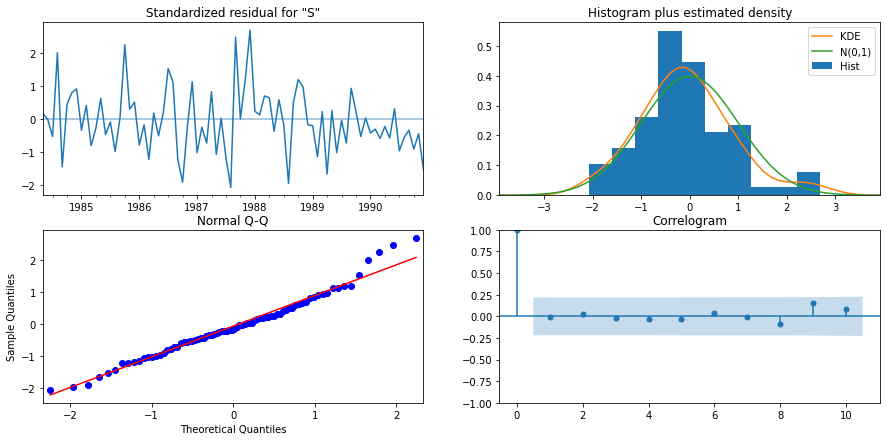

In [131]:
results_auto_SARIMA.plot_diagnostics();

In [132]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [133]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-01,1430.420801,431.181405,585.320775,2275.520826
1991-02-01,1540.095652,458.336036,641.773529,2438.417776
1991-03-01,1707.016747,460.119537,805.199025,2608.834468
1991-04-01,1858.125038,466.703696,943.402602,2772.847474
1991-05-01,1501.298817,467.001037,585.993605,2416.604030


In [134]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 331.82836603269527 
MAPE: 11.894017387891308


In [135]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(3,1,3)(3,1,0,12)'])
resultsDf2 = pd.concat([resultsDf2,temp_resultsDf])
resultsDf2

,RMSE,MAPE
"ARIMA(2,1,2)",1299.979821,47.099974
"ARIMA(3,1,3)",1228.356398,39.468531
"SARIMA(3,1,3)(3,1,0,12)",331.828366,11.894017


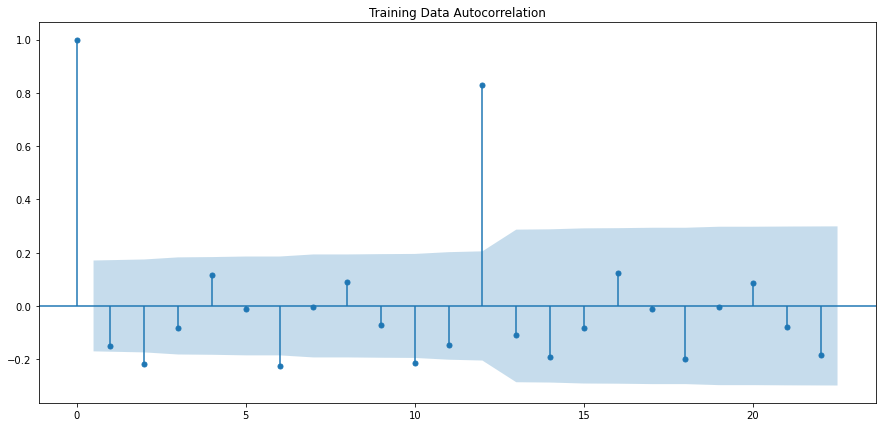

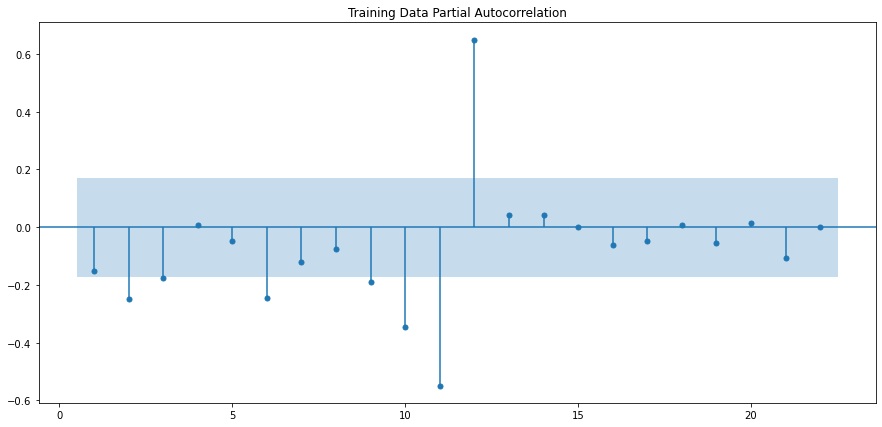

In [136]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

In [137]:
manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(3,1,1),
                                seasonal_order=(1, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -693.697
Date:                                 Tue, 13 Dec 2022   AIC                           1403.394
Time:                                         06:22:58   BIC                           1423.654
Sample:                                     01-01-1980   HQIC                          1411.574
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2229      0.130      1.713      0.087      -0.032       0

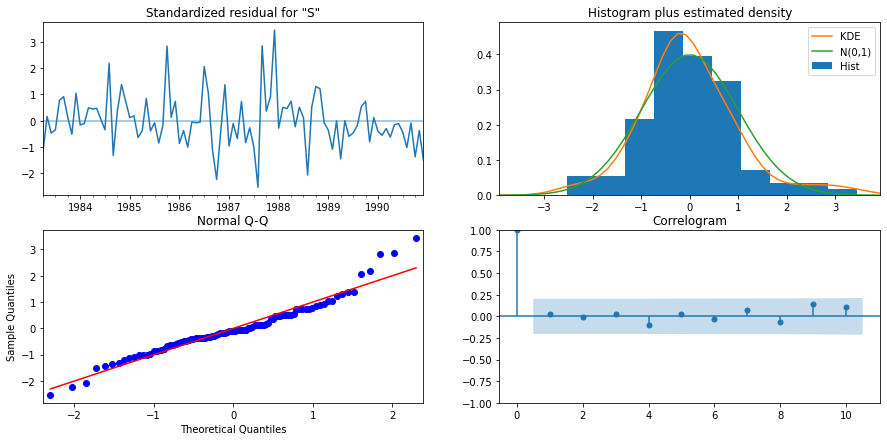

In [138]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [139]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [140]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 324.10740921551553 
MAPE: 11.046196964926136


In [141]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(3,1,3)(3,1,2,12)'])
resultsDf2 = pd.concat([resultsDf2,temp_resultsDf])
resultsDf2

,RMSE,MAPE
"ARIMA(2,1,2)",1299.979821,47.099974
"ARIMA(3,1,3)",1228.356398,39.468531
"SARIMA(3,1,3)(3,1,0,12)",331.828366,11.894017
"SARIMA(3,1,3)(3,1,2,12)",324.107409,11.046197


In [142]:
full_data_model = sm.tsa.statespace.SARIMAX(df1['Sparkling'],
                                order=(3,1,3),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                        SARIMAX Results                                        
Dep. Variable:                               Sparkling   No. Observations:                  187
Model:             SARIMAX(3, 1, 3)x(3, 1, [1, 2], 12)   Log Likelihood                -997.633
Date:                                 Tue, 13 Dec 2022   AIC                           2019.267
Time:                                         06:23:31   BIC                           2054.130
Sample:                                     01-01-1980   HQIC                          2033.434
                                          - 07-01-1995                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9981      0.100     -9.988      0.000      -1.194      -0

In [143]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [144]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,1947.370978,386.467543,1189.908512,2704.833444
1995-09-01,2383.913512,393.351760,1612.958230,3154.868794
1995-10-01,3342.741249,393.544568,2571.408069,4114.074430
1995-11-01,3847.480184,393.547443,3076.141368,4618.818999
1995-12-01,6107.761720,394.792792,5333.982066,6881.541374


In [145]:
rmse = mean_squared_error(df1['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 610.872467899106


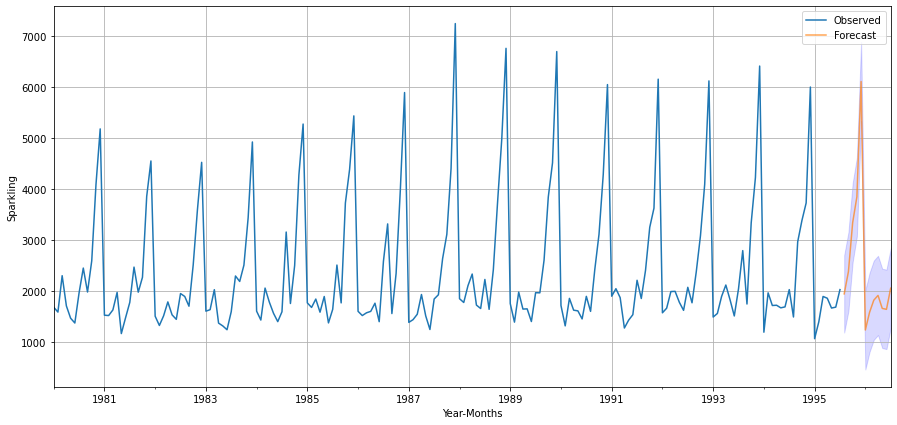

In [146]:
axis = df1['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid();

Text(0.5, 1.0, 'SPARKLING : 12 Months Forecast')

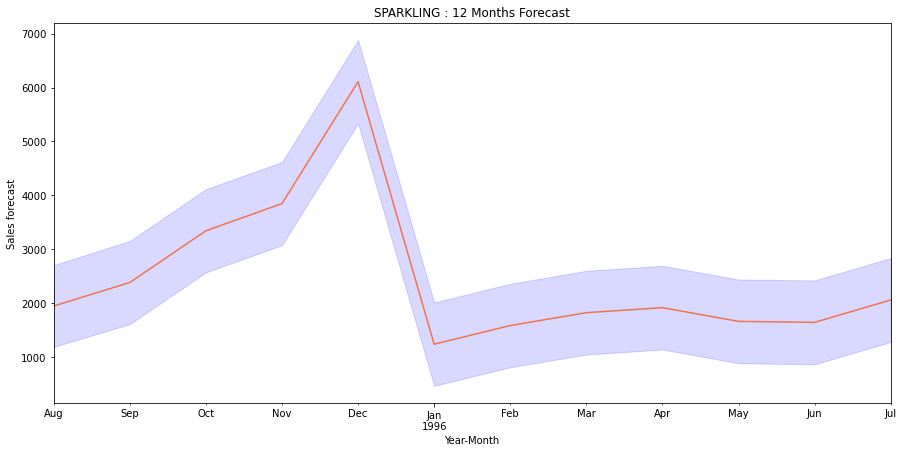

In [147]:
axis = pred_full_manual_SARIMA_date['mean'].plot( alpha=0.7, color = 'orangered')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month')
plt.ylabel('Sales forecast')
plt.title('SPARKLING : 12 Months Forecast', fontsize=12)

In [148]:
forecast = pd.DataFrame({'Sparkling':np.round(pred_full_manual_SARIMA_date['mean'],2)})
forecast

,Sparkling
1995-08-01,1947.37
1995-09-01,2383.91
1995-10-01,3342.74
1995-11-01,3847.48
1995-12-01,6107.76
1996-01-01,1240.07
1996-02-01,1585.72
1996-03-01,1824.07
1996-04-01,1917.47
1996-05-01,1663.12


In [149]:
np.sum(forecast['Sparkling'])

29563.32

In [150]:
forecast.describe()

,Sparkling
count,12.000000
mean,2463.610000
std,1371.500522
min,1240.070000
25%,1658.425000
50%,1932.420000
75%,2623.617500
max,6107.760000


In [151]:
resultsDf2

,RMSE,MAPE
"ARIMA(2,1,2)",1299.979821,47.099974
"ARIMA(3,1,3)",1228.356398,39.468531
"SARIMA(3,1,3)(3,1,0,12)",331.828366,11.894017
"SARIMA(3,1,3)(3,1,2,12)",324.107409,11.046197


In [152]:
resultsDf = pd.concat([resultsDf2,resultsDf])
resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",1299.979821,47.099974
"ARIMA(3,1,3)",1228.356398,39.468531
"SARIMA(3,1,3)(3,1,0,12)",331.828366,11.894017
"SARIMA(3,1,3)(3,1,2,12)",324.107409,11.046197
RegressionOnTime,1389.135175,NaN
NaiveModel,3864.279352,NaN
SimpleAverageModel,1275.081804,NaN
2pointTrailingMovingAverage,813.400684,NaN
4pointTrailingMovingAverage,1156.589694,NaN
6pointTrailingMovingAverage,1283.927428,NaN
